In [1]:
# basic
import pandas as pd
import numpy as np

# for plot
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
# Load and return the boston house-prices dataset.
boston = load_boston()
X = boston.data
y = boston.target

In [3]:
# Normalize X and y
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(-1,1)).reshape(-1)

In [4]:
# Randomly choose 30% of the data for testing (set randome_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [5]:
def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the regression    
    :param regressor: a regressor 
    """
    # Declare the model
    reg = regressor()
    
    # evaluate the model
    reg.fit(X_train, y_train)
    
    if classifier is RandomForestRegressor:
        global importances
        # Get the feature importances
        importances = reg.feature_importances_
        
    # Update the list of R^2
    r_squared.append(reg.score(X_test, y_test))

Note that mean squared error values are inverted (negative). This is a quirk of the cross val score() function used that requires all algorithm metrics to be sorted in ascending order (larger value is better).

In [6]:
# The list of regressors
regs = [LinearRegression, RidgeCV, LassoCV, ElasticNet, KNeighborsRegressor, 
        DecisionTreeRegressor, BaggingRegressor, RandomForestRegressor, SVR]

# The list of r-squared
r_squared = []

# For each regressor
for regressor in regs:
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(regressor)

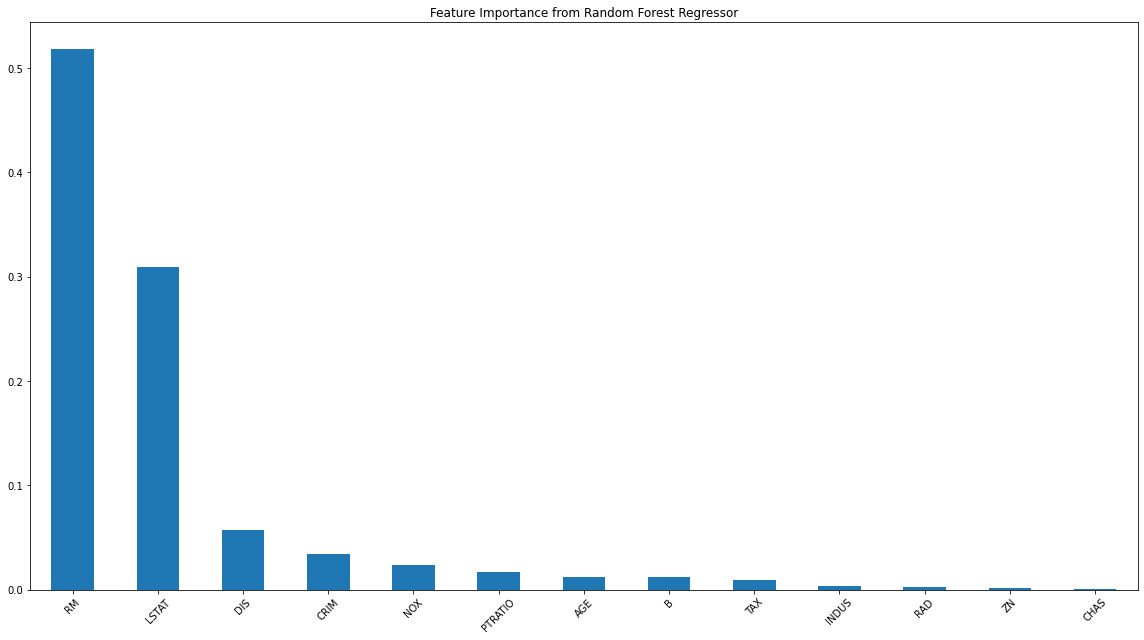

In [7]:
# Convert the importances into one-dimensional 1d-array with corresponding df column names as axis labels
f_importances = pd.Series(importances, boston.feature_names)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=10)

# Show the plot
plt.title("Feature Importance from Random Forest Regressor")
plt.tight_layout()
plt.show()

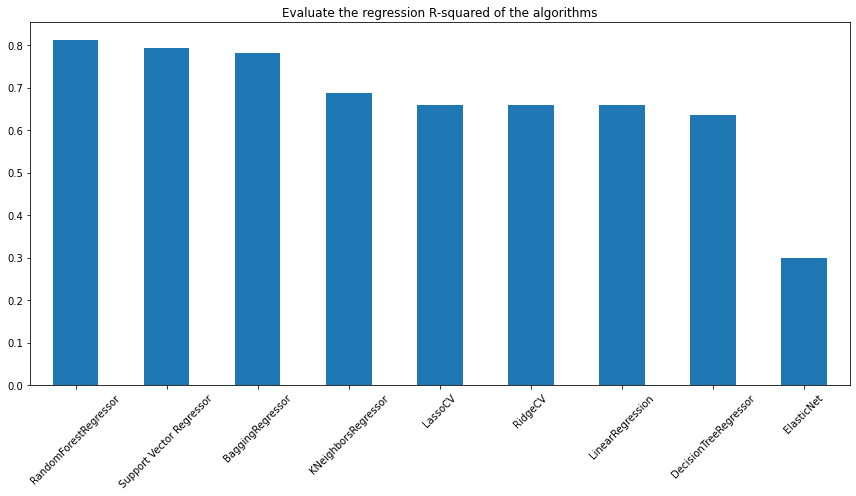

In [8]:
# Convert the R-squared into one-dimensional 1darray with corresponding classifier names as axis labels
reg_r_squared = pd.Series(r_squared, ['LinearRegression', 'RidgeCV', 'LassoCV', 'ElasticNet', 'KNeighborsRegressor', 
                                       'DecisionTreeRegressor', 'BaggingRegressor', 'RandomForestRegressor', 
                                      'Support Vector Regressor'])

# Sort the array in descending order of the r squared
reg_r_squared = reg_r_squared.sort_values(ascending=False)

# Draw the bar plot from reg_r_squared
reg_r_squared.plot(x='Regressor', y='R-squared', kind='bar', figsize=(12,7), rot=45, fontsize=10)

# Show the plot
plt.title("Evaluate the regression R-squared of the algorithms")
plt.tight_layout()
plt.show()

In [9]:
reg_r_squared

RandomForestRegressor       0.812987
Support Vector Regressor    0.793516
BaggingRegressor            0.781584
KNeighborsRegressor         0.688463
LassoCV                     0.660023
RidgeCV                     0.659644
LinearRegression            0.659043
DecisionTreeRegressor       0.635556
ElasticNet                  0.298605
dtype: float64